# Holistic Health Group Project

## Project Set-Up

### Create Git Repository

```
cd "./Data Science/M6006_assignment3_23407618514"
git clone https://github.com/tabsbower/M6006_assignment3_23407618514
```

### Purpose of the project

The purpose of this project is to discover which variables, or comnbination of variables, are the best predictors of overall health score in order to make suggestions about where real-world interventions could be deployed.

## Introduction

### Description of Dataset

### Research questions

- How do lifestyle factors (smoking, alcohol, nutrition) predict health outcomes?
- Are mental well-being factors (sleep, mindfulness, stress) associated more or less than physical factors (nutrition, excersise, hydration) with health?
- Can we predict whether someone is a ....

#### Hypothesis

Sleep, Stress, and Mindfulness are more influential predictors of Overall Health Score than physical factors.

### Load Relevant Libraries and the Data

In [56]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
#load data
df = pd.read_csv('holistic_health_lifestyle_dataset.csv')
df.head()

Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572     0.000000     6.292214   
1          42.234714         6.389001      5.566647     4.450144     8.519054   
2          57.953771         5.805238      3.126960     9.129716     6.702720   
3          75.460597         7.220836      6.159168    16.496689     7.135854   
4          40.316933         9.394357      2.019835    25.241623     8.076086   

   Hydration        BMI   Alcohol   Smoking  Overall_Health_Score  \
0   2.578565  24.275932  4.280610  8.984006             36.950187   
1   2.448713  25.970141  7.461846  3.223304             55.167774   
2   3.261433  25.193857  0.000000  4.600482             78.304426   
3   3.726265  19.527300  9.958423  3.947706             94.018274   
4   3.049478  23.348229  4.320347  8.084322            100.000000   

  Health_Status  
0          Poor  
1       Average  
2          Good  
3          Good  
4          Good

In [39]:
#create a numeric version of the Health_Status column
df['Health_Status_numeric'] = df['Health_Status'].map({'Poor': 1, 'Average': 2, 'Good':3 })
df.head()

Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572     0.000000     6.292214   
1          42.234714         6.389001      5.566647     4.450144     8.519054   
2          57.953771         5.805238      3.126960     9.129716     6.702720   
3          75.460597         7.220836      6.159168    16.496689     7.135854   
4          40.316933         9.394357      2.019835    25.241623     8.076086   

   Hydration        BMI   Alcohol   Smoking  Overall_Health_Score  \
0   2.578565  24.275932  4.280610  8.984006             36.950187   
1   2.448713  25.970141  7.461846  3.223304             55.167774   
2   3.261433  25.193857  0.000000  4.600482             78.304426   
3   3.726265  19.527300  9.958423  3.947706             94.018274   
4   3.049478  23.348229  4.320347  8.084322            100.000000   

  Health_Status  Health_Status_numeric  
0          Poor                      1  
1       Average                      2  
2          Good                      3  
3          Good                      3  
4          Good                      3

## Clean and Explore the Data

### Exploring the Data

   | Column Name            | Description     |
   | ---------------------- | --------------- |
   | Physical_Activity      | Minutes of moderate to vigorous exercise per day (0–120)     |
   | Nutrition_Score        | Diet quality (0–10) based on nutrient density, balance, and variety    |
   | Stress_Level           | Self-reported stress (1–10), where 10 = very high stress|
   | Mindfulnes             | Minutes per day spent in meditation, journaling, or mindful activity (0–60)         |
   | Sleep_Hours            | Average hours of sleep per night (3–10)        |
   | Hydration              | Liters of water consumed per day (0.5–5.0)    |
   | BMI                    | Body Mass Index (18–40)      |
   | Alcohol                | Units of alcohol per week (0–20)  |
   | Smoking                | Cigarettes per day (0–30) |
  
 

We will now explore the data using .describe(), .info() and shape

In [40]:
df.describe()

Physical_Activity  Nutrition_Score  Stress_Level   Mindfulness  \
count       10000.000000     10000.000000  10000.000000  10000.000000   
mean           45.047069         6.966599      4.987202     15.224636   
std            19.832871         1.883295      1.938195      9.454891   
min             0.000000         0.000000      1.000000      0.000000   
25%            31.548189         5.675978      3.599696      8.053871   
50%            44.948100         7.031693      4.988464     14.896178   
75%            58.421618         8.387730      6.327795     21.790305   
max           120.000000        10.000000     10.000000     52.278333   

        Sleep_Hours     Hydration           BMI       Alcohol       Smoking  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       7.000194      2.503302     24.095086      3.523663      5.706911   
std        1.468580      0.801660      3.356663      3.270784      5.000260   
min        3.000000      0.500000     18.000000      0.000000      0.000000   
25%        6.003898      1.958461     21.653393      0.298894      1.065818   
50%        7.014341      2.506579     24.072122      2.980658      4.954994   
75%        8.025752      3.052666     26.380536      5.706382      8.991626   
max       10.000000      5.000000     36.376168     18.040621     27.978693   

       Overall_Health_Score  Health_Status_numeric  
count          10000.000000           10000.000000  
mean              78.227945               2.634100  
std               19.697853               0.561826  
min                2.217088               1.000000  
25%               64.627060               2.000000  
50%               81.118118               3.000000  
75%               97.972163               3.000000  
max              100.000000               3.000000

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Physical_Activity      10000 non-null  float64
 1   Nutrition_Score        10000 non-null  float64
 2   Stress_Level           10000 non-null  float64
 3   Mindfulness            10000 non-null  float64
 4   Sleep_Hours            10000 non-null  float64
 5   Hydration              10000 non-null  float64
 6   BMI                    10000 non-null  float64
 7   Alcohol                10000 non-null  float64
 8   Smoking                10000 non-null  float64
 9   Overall_Health_Score   10000 non-null  float64
 10  Health_Status          10000 non-null  object 
 11  Health_Status_numeric  10000 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 937.6+ KB


From the above we can see that the dataset has no NaN values that need to be dealt with.

We will now rename the columns in our dataset to make the data more readable.

### Clean the Data

We did not adopt any cleaning techniques on this data as there were no missing values and we were satisfied with labels

## Exploratory Data Analysis
- visualising distributions
- correlation heatmaps
- group compaisions 

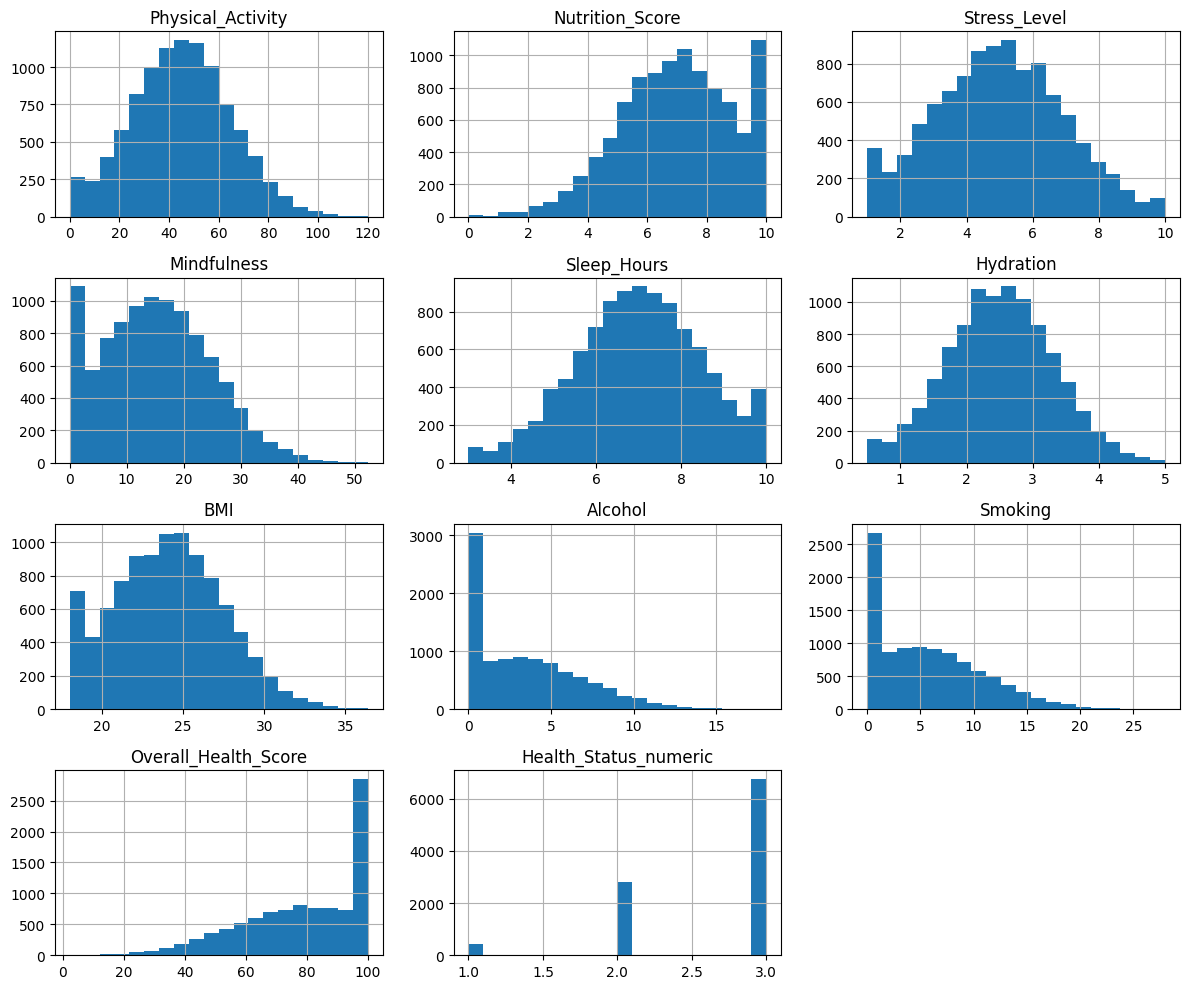

In [42]:
#plot the distribution of each column
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

### Variable transformation

#### Binarising Smoking and Drinking

In [43]:
df['Alcohol_binary'] = df['Alcohol'].apply(lambda x: 1 if x > 0 else 0)
df['Smoking_binary'] = df['Smoking'].apply(lambda x: 1 if x > 0 else 0)

df[['Alcohol_binary', 'Smoking_binary']].mean()

Alcohol_binary    0.7726
Smoking_binary    0.8004
dtype: float64

#### Grouped Variables

In [44]:
# Physical factors group
physical_factors = [
    'Smoking',
    'Alcohol',
    'Nutrition_Score',
    'Physical_Activity',
    'BMI',
    'Hydration']

physical_df = df[physical_factors]

In [45]:
df['Lifestyle_Index'] = (
    df['Nutrition_Score'] +
    df['Physical_Activity'] +
    df['Hydration'] -
    df['Smoking'] -
    df['Alcohol'] )

In [46]:
# Mental factors group
mental_factors = [
    'Mindfulness',
    'Sleep_Hours',
    'Stress_Level']

mental_df = df[mental_factors]

In [47]:
df['Mental_Index'] = (
    df['Sleep_Hours'] +
    df['Mindfulness'] -
    df['Stress_Level'])

In [48]:
df['Mental_Index'] = (df['Sleep_Hours'] + df['Mindfulness'] - df['Stress_Level'])

In [49]:
physical_df = df[physical_factors].copy()
mental_df = df[mental_factors].copy()

### Correlation

#### Heatmap

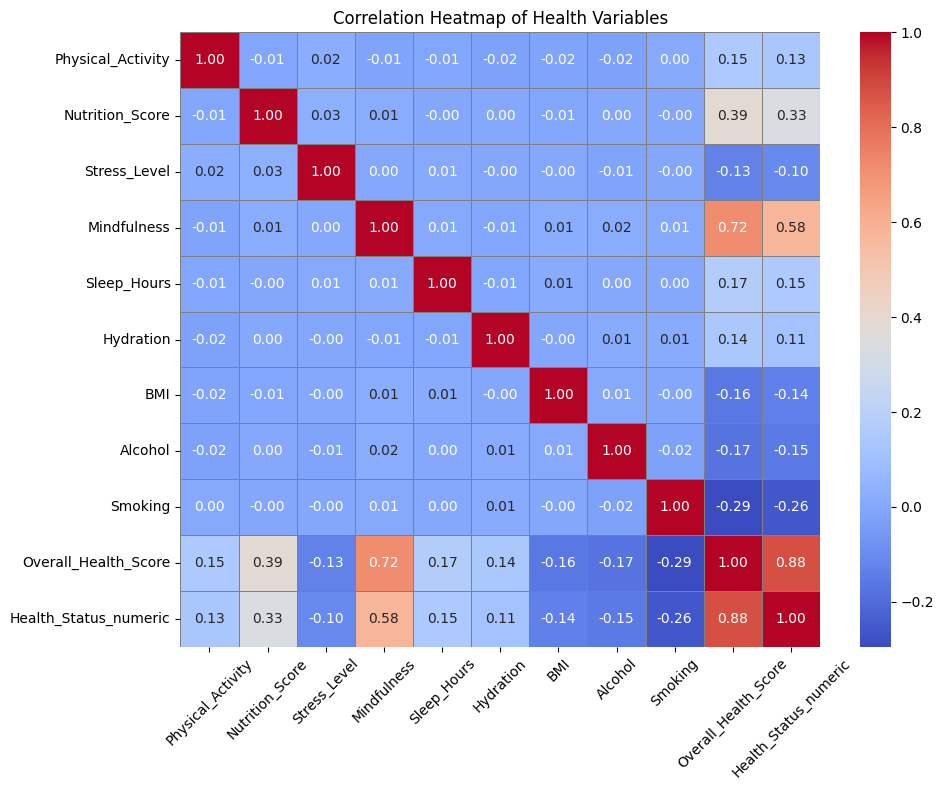

In [50]:
columns = ['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking', 'Overall_Health_Score', 'Health_Status_numeric']   
corr_matrix = df[columns].corr() # Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap of Health Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Pairplot

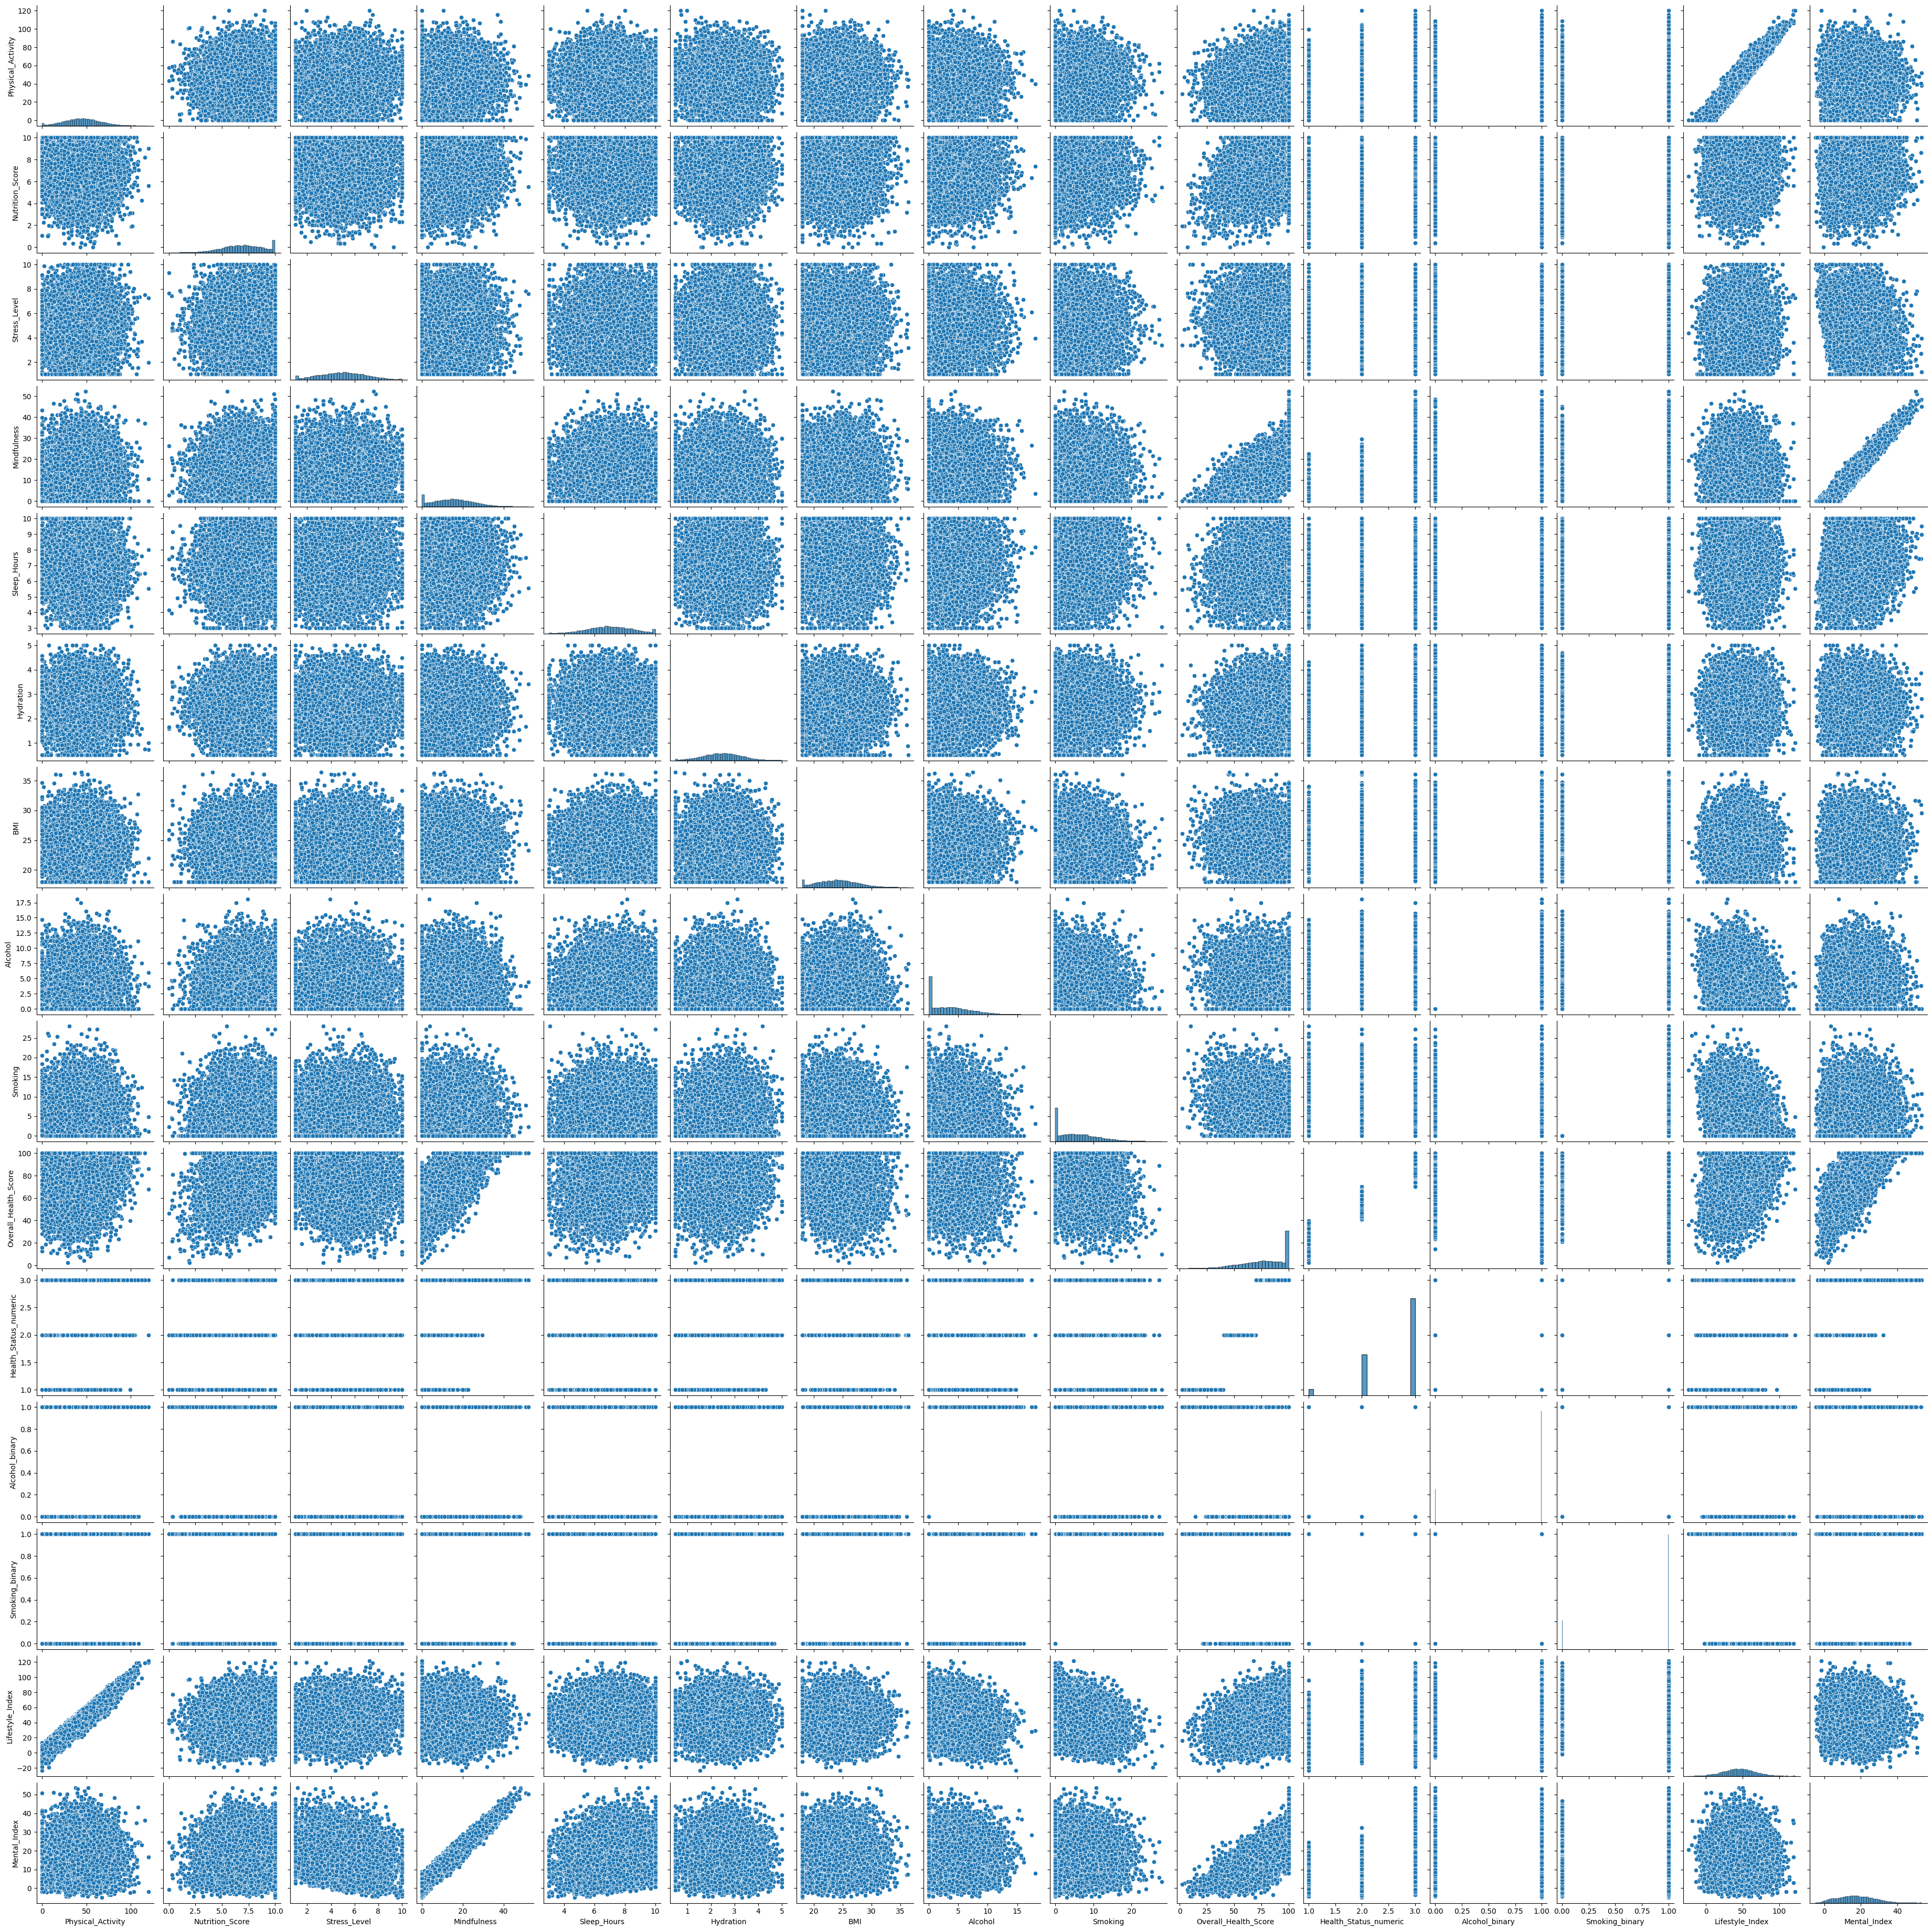

In [51]:
sns.pairplot(df)

/var/folders/j9/3_02cc2s0bqgyb6c2rq2m83r0000gn/T/ipykernel_77253/3356496728.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['BMI'], df['Nutrition_Score']], labels=['BMI', 'Nutrition'])


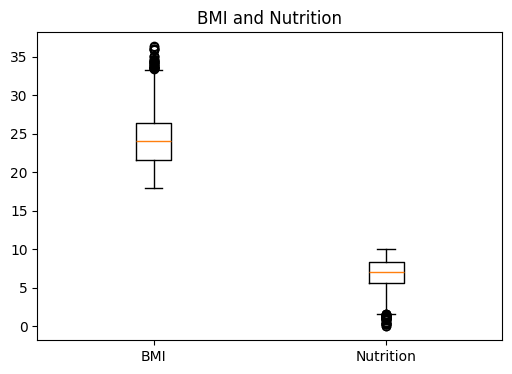

In [52]:
plt.figure(figsize=(6, 4))
plt.boxplot([df['BMI'], df['Nutrition_Score']], labels=['BMI', 'Nutrition'])
plt.title('BMI and Nutrition')
plt.show()

#### Group Comparisons

# Regression Analysis on the Data

## Simple Linear Regression

### Comparing the variable's infuence of the variables over predicting Overall Health Score

#### R-squared

In [ ]:
predictors = ['Sleep_Hours', 'Stress_Level', 'Nutrition_Score', 'Physical_Activity', 
              'BMI', 'Hydration', 'Mindfulness', 'Alcohol', 'Smoking']

for var in predictors:
    X = df[[var]]
    y = df['Overall_Health_Score']

    #train/test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    #fit model on training only
    model = LinearRegression()
    model.fit(X_train, y_train)

    #predict on test set
    y_pred = model.predict(X_test)

    #evaluate on the test set
    test_r2 = r2_score(y_test, y_pred)

    print(f"{var}: Test R-squared = {test_r2:.4f}")

Sleep_Hours: Test R-squared = 0.0292
Stress_Level: Test R-squared = 0.0113
Nutrition_Score: Test R-squared = 0.1380
Physical_Activity: Test R-squared = 0.0213
BMI: Test R-squared = 0.0267
Hydration: Test R-squared = 0.0138
Mindfulness: Test R-squared = 0.5099
Alcohol: Test R-squared = 0.0359
Smoking: Test R-squared = 0.1045


#### Simple Linear Regression

In [76]:
#BMI
X = df[('BMI')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.026
Method:                   Least Squares   F-statistic:                     263.6
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):           1.57e-58
Time:                          17:17:21   Log-Likelihood:                -43864.
No. Observations:                 10000   AIC:                         8.773e+04
Df Residuals:                      9998   BIC:                         8.775e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.8907      1.409

In [78]:
#Alcohol
X = df[('Alcohol')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.031
Model:                              OLS   Adj. R-squared:                  0.030
Method:                   Least Squares   F-statistic:                     314.8
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):           2.22e-69
Time:                          17:17:42   Log-Likelihood:                -43839.
No. Observations:                 10000   AIC:                         8.768e+04
Df Residuals:                      9998   BIC:                         8.770e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9357      0.285

In [80]:
#Smoking
#BMI
X = df[('Smoking')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.087
Model:                              OLS   Adj. R-squared:                  0.087
Method:                   Least Squares   F-statistic:                     949.0
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):          3.66e-199
Time:                          17:17:57   Log-Likelihood:                -43541.
No. Observations:                 10000   AIC:                         8.709e+04
Df Residuals:                      9998   BIC:                         8.710e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.8472      0.286

In [81]:
#Physical Activity
X = df[('Physical_Activity')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.021
Model:                              OLS   Adj. R-squared:                  0.021
Method:                   Least Squares   F-statistic:                     217.8
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):           8.88e-49
Time:                          17:18:14   Log-Likelihood:                -43886.
No. Observations:                 10000   AIC:                         8.778e+04
Df Residuals:                      9998   BIC:                         8.779e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [82]:
#Mindfulness
X = df[('Mindfulness')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.512
Model:                              OLS   Adj. R-squared:                  0.512
Method:                   Least Squares   F-statistic:                 1.051e+04
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                          17:18:28   Log-Likelihood:                -40402.
No. Observations:                 10000   AIC:                         8.081e+04
Df Residuals:                      9998   BIC:                         8.082e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5223      0.

In [83]:
#Stress Level
X = df[('Stress_Level')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.017
Model:                              OLS   Adj. R-squared:                  0.017
Method:                   Least Squares   F-statistic:                     170.0
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):           1.50e-38
Time:                          17:18:39   Log-Likelihood:                -43910.
No. Observations:                 10000   AIC:                         8.782e+04
Df Residuals:                      9998   BIC:                         8.784e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           84.7823     

In [84]:
#Sleep hours
X = df[('Sleep_Hours')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.030
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     304.3
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):           3.80e-67
Time:                          17:18:53   Log-Likelihood:                -43844.
No. Observations:                 10000   AIC:                         8.769e+04
Df Residuals:                      9998   BIC:                         8.771e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          62.0920      0.

In [85]:
#Nutrition
X = df[('Nutrition_Score')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     1747.
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                          17:19:24   Log-Likelihood:                -43189.
No. Observations:                 10000   AIC:                         8.638e+04
Df Residuals:                      9998   BIC:                         8.640e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              50.

In [86]:
#Hydration
X = df[('Hydration')]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                  0.020
Method:                   Least Squares   F-statistic:                     205.9
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):           3.13e-46
Time:                          17:19:30   Log-Likelihood:                -43892.
No. Observations:                 10000   AIC:                         8.779e+04
Df Residuals:                      9998   BIC:                         8.780e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4909      0.639

### Multiple linear regression

In [54]:
X = df[predictors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.907
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                 1.082e+04
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                          16:46:24   Log-Likelihood:                -32121.
No. Observations:                 10000   AIC:                         6.426e+04
Df Residuals:                      9990   BIC:                         6.433e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [33]:
X = df[physical_factors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.336
Model:                              OLS   Adj. R-squared:                  0.336
Method:                   Least Squares   F-statistic:                     842.7
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                          16:10:09   Log-Likelihood:                -41947.
No. Observations:                 10000   AIC:                         8.391e+04
Df Residuals:                      9993   BIC:                         8.396e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [34]:
X = df[mental_factors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.557
Model:                              OLS   Adj. R-squared:                  0.557
Method:                   Least Squares   F-statistic:                     4194.
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                          16:10:09   Log-Likelihood:                -39920.
No. Observations:                 10000   AIC:                         7.985e+04
Df Residuals:                      9996   BIC:                         7.988e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.5692     

#### Training the Data 

In [59]:
#training/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [72]:
train_r2 = model.score(X_train, y_train)
test_r2  = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train R²:", train_r2)
print("Test R²: ", test_r2)
print("RMSE:    ", rmse)

Train R²: 0.9097386538519018
Test R²:  0.8954316721111603
RMSE:     6.366307357759395


In [73]:
#cooefficients
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_})

print("\nCoefficients:")
print(coef_table)


Coefficients:
             Feature  Coefficient
0        Sleep_Hours     2.356160
1       Stress_Level    -1.529138
2    Nutrition_Score     3.966108
3  Physical_Activity     0.160078
4                BMI    -0.960024
5          Hydration     3.945706
6        Mindfulness     1.509109
7            Alcohol    -1.181040
8            Smoking    -1.205498


none of the confidence intervals cross 0, meaning that each variable holds some significance in predicting overall health score

### Logistic Regression
- confusion matrix

### Comparing Mental vs Physical Predictors 

12. Advanced (Optional)
Only if you want bonus depth:
Standardisation of predictors
PCA on physical + mental factors
Clustering to detect lifestyle patterns

## Make it Shiny

# Discussion of Findings

# Conclusison